## Importaçaõ das Bibliotecas

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
pd.options.display.float_format = '{:.2f}'.format

## Importação dos Dados

In [2]:
url = "https://raw.githubusercontent.com/luizhmoraes/Predicao-de-Precos-de-Imoveis/main/Dados/dados_imoveis.csv"
df = pd.read_csv(url)

In [3]:
df.head()

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,R$ 685.000
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10008 entries, 0 to 10007
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Rua        6574 non-null   object
 1   Bairro     9996 non-null   object
 2   Cidade     10008 non-null  object
 3   Metragem   10008 non-null  int64 
 4   Quartos    10008 non-null  int64 
 5   Banheiros  10008 non-null  int64 
 6   Vagas      10008 non-null  int64 
 7   Valor      10008 non-null  object
dtypes: int64(4), object(4)
memory usage: 625.6+ KB


### Ajustar o tipo de dado da variavel Valor (de object para float)

In [5]:
df[['Moeda','Valor_anuncio','Tipo_anuncio']] = df['Valor'].str.split(expand=True)
df.head()

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Moeda,Valor_anuncio,Tipo_anuncio
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000,R$,7.000.000,None
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000,R$,3.700.000,None
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000,R$,380.000,None
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,R$ 685.000,R$,685.000,None
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000,R$,540.000,None


In [6]:
df['Tipo_anuncio'].unique()

array([None, '/Mês', '/Ano', '/Dia'], dtype=object)

In [7]:
df_vendas = df[df['Tipo_anuncio'].isnull()]
df_vendas['Valor_anuncio'] = df_vendas['Valor_anuncio'].str.replace(".","").astype("int64")
df_vendas.dtypes

C:\Users\luiz_\AppData\Local\Temp\ipykernel_19360\1546517312.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_vendas['Valor_anuncio'] = df_vendas['Valor_anuncio'].str.replace(".","").astype("int64")


Rua              object
Bairro           object
Cidade           object
Metragem          int64
Quartos           int64
Banheiros         int64
Vagas             int64
Valor            object
Moeda            object
Valor_anuncio     int64
Tipo_anuncio     object
dtype: object

In [8]:
df_vendas['Valor'] = df_vendas.Valor.apply(lambda x: x.split()[1].replace(".","")).astype("int64")
df_vendas.dtypes

C:\Users\luiz_\AppData\Local\Temp\ipykernel_19360\4269187300.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_vendas['Valor'] = df_vendas.Valor.apply(lambda x: x.split()[1].replace(".","")).astype("int64")


Rua              object
Bairro           object
Cidade           object
Metragem          int64
Quartos           int64
Banheiros         int64
Vagas             int64
Valor             int64
Moeda            object
Valor_anuncio     int64
Tipo_anuncio     object
dtype: object

In [9]:
df_vendas.drop('Valor', axis=1, inplace=True)

C:\Users\luiz_\AppData\Local\Temp\ipykernel_19360\1205421776.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_vendas.drop('Valor', axis=1, inplace=True)


###  Visualizar a media de cada variaveil numerica para cada um dos bairros

In [10]:
medias_por_bairro = df_vendas.groupby('Bairro')[['Valor_anuncio', 'Metragem', 'Quartos', 'Banheiros', 'Vagas']].mean().reset_index().round(2)

colunas = { 
    'Valor_anuncio': 'Valor Medio', 
    'Metragem': 'Metragem Media', 
    'Quartos': 'Quartos Medios', 
    'Banheiros': 'Banheiros Medios', 
    'Vagas' : 'Vagas Medias'
}
medias_por_bairro = medias_por_bairro.rename(columns=colunas)

medias_por_bairro['Valor Medio'] = medias_por_bairro['Valor Medio'].apply(lambda x: "{:,.2f}".format(x))

medias_por_bairro.head(20)

,Bairro,Valor Medio,Metragem Media,Quartos Medios,Banheiros Medios,Vagas Medias
0,Aclimação,"1,763,200.01",246.16,3.27,3.04,2.91
1,Alto da Boa Vista,"2,391,250.00",418.88,4.12,5.12,4.62
2,Alto da Lapa,"2,083,168.75",299.25,3.15,3.85,4.00
3,Alto da Mooca,"1,184,170.00",270.05,3.30,2.60,3.65
4,Alto de Pinheiros,"4,782,698.96",429.85,3.94,4.83,4.95
5,Aricanduva,"480,000.00",278.00,3.00,3.00,2.00
6,Balneário Mar Paulista,"900,000.00",250.00,4.00,4.00,10.00
7,Barra Funda,"768,666.83",135.44,2.50,2.39,1.39
8,Barro Branco (Zona Norte),"3,162,222.22",519.44,3.56,4.11,5.11
9,Bela Aliança,"2,110,833.33",297.22,3.22,4.11,4.11


### Visualizar estatísticas gerais dos dados

In [11]:
df_vendas.describe().round(2)

,Metragem,Quartos,Banheiros,Vagas,Valor_anuncio
count,9156.00,9156.00,9156.00,9156.00,9156.00
mean,434.42,3.45,3.80,3.96,3052202.96
std,7856.42,1.05,1.97,2.60,3944208.19
min,10.00,1.00,1.00,1.00,13000.00
25%,168.00,3.00,2.00,2.00,890000.00
50%,276.00,3.00,4.00,4.00,1800000.00
75%,450.00,4.00,5.00,5.00,3500000.00
max,750000.00,16.00,40.00,50.00,65000000.00


Correlação entre as variaveis numericas:

In [12]:
df_vendas.corr(numeric_only=True).style.background_gradient(cmap='Reds')

,Metragem,Quartos,Banheiros,Vagas,Valor_anuncio
Metragem,1.000000,0.031571,0.045343,0.027809,0.032214
Quartos,0.031571,1.000000,0.521820,0.387107,0.330045
Banheiros,0.045343,0.521820,1.000000,0.445968,0.430638
Vagas,0.027809,0.387107,0.445968,1.000000,0.468989
Valor_anuncio,0.032214,0.330045,0.430638,0.468989,1.000000


In [13]:
df_vendas.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9156 entries, 0 to 10007
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Rua            6107 non-null   object
 1   Bairro         9146 non-null   object
 2   Cidade         9156 non-null   object
 3   Metragem       9156 non-null   int64 
 4   Quartos        9156 non-null   int64 
 5   Banheiros      9156 non-null   int64 
 6   Vagas          9156 non-null   int64 
 7   Moeda          9156 non-null   object
 8   Valor_anuncio  9156 non-null   int64 
 9   Tipo_anuncio   0 non-null      object
dtypes: int64(5), object(5)
memory usage: 786.8+ KB


### Visualizar registros com a rua em branco

In [14]:
ruas_vazias = df_vendas[df_vendas['Rua'].isnull()]
bairros_vazios = df_vendas[df_vendas['Bairro'].isnull()]

In [15]:
ruas_vazias

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Moeda,Valor_anuncio,Tipo_anuncio
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,R$,685000,None
11,NaN,Jardim Luzitânia,São Paulo,436,4,3,3,R$,15000,None
31,NaN,Parque da Lapa,São Paulo,220,4,4,3,R$,849000,None
56,NaN,Chácara Santo Antônio (Zona Sul),São Paulo,190,2,2,2,R$,1100000,None
57,NaN,Jardim Guedala,São Paulo,650,4,6,4,R$,5500000,None
...,...,...,...,...,...,...,...,...,...,...
9963,NaN,Jardim Petrópolis,São Paulo,423,5,7,6,R$,2800000,None
9989,NaN,Parque Alves de Lima,São Paulo,127,2,1,2,R$,400000,None
9991,NaN,Vila Formosa,São Paulo,145,3,2,3,R$,750000,None
9995,NaN,Jardim Leonor,São Paulo,1350,5,9,7,R$,9500000,None


In [16]:
bairros_vazios

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Moeda,Valor_anuncio,Tipo_anuncio
7956,Rua Vergueiro,NaN,São Paulo,103,3,2,2,R$,640000,None
7996,"Rua Alvorada do Sul, 3773",NaN,São Paulo,678,4,8,8,R$,6895000,None
8126,"Rua Professor Eduardo Monteiro, 3773",NaN,São Paulo,550,3,5,6,R$,4000000,None
8566,"Avenida Comendador Adibo Ares, 3773",NaN,São Paulo,694,4,6,6,R$,3890000,None
8619,"Rua Alvorada do Sul, 3773",NaN,São Paulo,683,4,8,8,R$,6895000,None
8739,"Rua Alvorada do Sul, 3773",NaN,São Paulo,683,4,8,8,R$,6895000,None
8868,"Rua Professor Eduardo Monteiro, 3773",NaN,São Paulo,555,3,5,6,R$,4000000,None
8992,"Rua Professor Eduardo Monteiro, 3773",NaN,São Paulo,555,3,5,6,R$,4000000,None
9310,"Rua Professor Lúcio Martins Rodrigues, 3773",NaN,São Paulo,358,4,6,7,R$,1600000,None
9540,"Rua Pacobá, 3773",NaN,São Paulo,1009,5,6,10,R$,6400000,None


In [17]:
print(f"{len(bairros_vazios)} registros com bairro em branco\n{len(ruas_vazias)} registros rua em branco")

10 registros com bairro em branco
3049 registros rua em branco


In [18]:
print("{:.2%} da base possui dados de rua vazios".format(len(ruas_vazias) / df.shape[0]))

30.47% da base possui dados de rua vazios


## Visualização de algumas variaveis

#### Preco do M² por bairro 

In [27]:
df_vendas.head()

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Moeda,Valor_anuncio,Tipo_anuncio
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$,7000000,None
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$,3700000,None
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$,380000,None
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,R$,685000,None
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$,540000,None


In [29]:
df_vendas['Preco_M2'] = df_vendas['Valor_anuncio'] / df_vendas['Metragem']
df_vendas.head()

C:\Users\luiz_\AppData\Local\Temp\ipykernel_19360\405269774.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_vendas['Preco_M2'] = df_vendas['Valor_anuncio'] / df_vendas['Metragem']


,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Moeda,Valor_anuncio,Tipo_anuncio,Preco_M2
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$,7000000,None,7000.00
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$,3700000,None,7459.68
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$,380000,None,3040.00
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,R$,685000,None,2209.68
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$,540000,None,5400.00


In [35]:
df_preco_m2_medio = df_vendas.groupby('Bairro')['Preco_M2'].mean().to_frame('Preco_M2_medio').reset_index()
df_preco_m2_medio = df_preco_m2_medio.sort_values(by='Preco_M2_medio', ascending=False)

### Exibindo o preço médio do m² por bairro em São Paulo

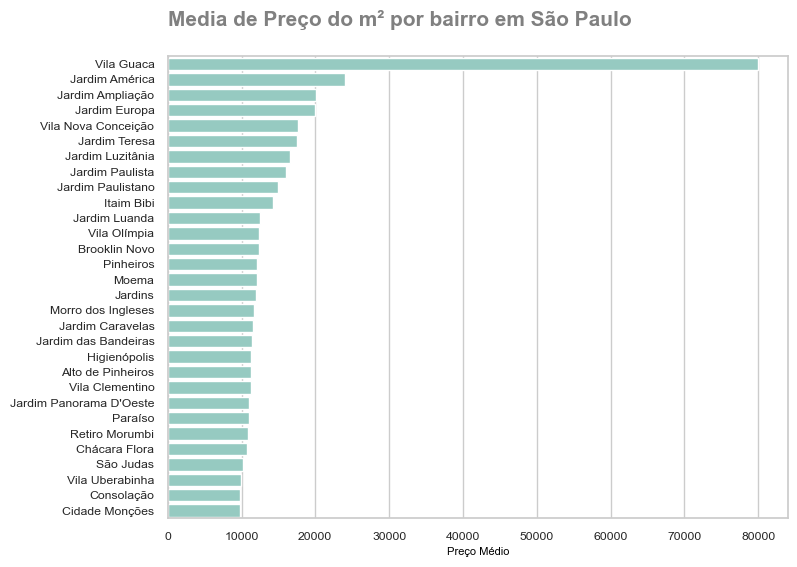

In [77]:
plt.figure(figsize=(8,6))
sns.set_theme(style="whitegrid", palette="Set3",font='sans-serif', font_scale=0.8)

ax = sns.barplot(data=df_preco_m2_medio.head(30), x='Preco_M2_medio', y='Bairro')

ax.set_ylabel(None)
ax.set_xlabel('Preço Médio', color='black', fontsize=8)

ax.set_title("Media de Preço do m² por bairro em São Paulo"+"\n", loc='left', weight='bold', color='gray', fontsize=15)

plt.show()